In [1]:
from sk import *
from IPython.display import Audio

In [2]:
audio_path = f'/content/testset-imda/10.wav'

[{'start': 4000, 'end': 41250}, {'start': 41250, 'end': 55750}, {'start': 55750, 'end': 109500}]


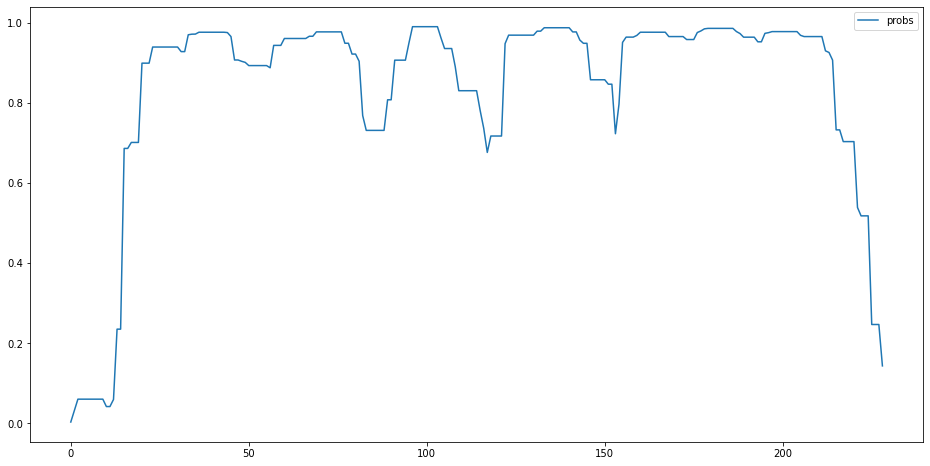

In [3]:
model = load_model("silero_vad")
wav,sr = read_audio(audio_path)
speech_timestamps = get_speech_ts_adaptive(wav, model,visualize_probs=True)
print(speech_timestamps)

In [4]:
Audio(audio_path)

In [5]:
arr = collect_chunks(speech_timestamps,wav)
Audio(arr,rate=16000)

In [6]:
asr = SK(model="silero_en",decoder="en")

Unigrams not provided and cannot be automatically determined from LM file (only arpa format). Decoding accuracy might be reduced.
Found entries of length > 1 in alphabet. This is unusual unless style is BPE, but the alphabet was not recognized as BPE type. Is this correct?
No known unigrams provided, decoding results might be a lot worse.


loaded model: /home/ubuntu/.sk/models/en_v5.onnx ['CPUExecutionProvider']
loaded lm: en


In [7]:
asr.transcribe_file(fn=audio_path,verbose=False)

{'texts': ['and it will be convenient for people to come from all over singapore even tourists who want to visit'],
 'filenames': ['/content/testset-imda/10.wav'],
 'entropy': [[-2.7060842514038086,
   -2.717939853668213,
   -2.7018930912017822,
   -2.718193531036377,
   -16.23672103881836,
   -2.717465400695801,
   -4.6656174659729,
   -2.717050552368164,
   -2.7177844047546387,
   -2.7182319164276123,
   -2.716304063796997,
   -4.77105712890625,
   -18.146169662475586,
   -2.692997932434082,
   -10.461612701416016,
   -2.7177720069885254,
   -2.7102057933807373,
   -5.241753578186035,
   -7.026993274688721]],
 'timestamps': [[('and', 0.03, 0.04),
   ('it', 0.05, 0.05),
   ('will', 1.0, 1.01),
   ('be', 1.02, 1.02),
   ('convenient', 1.03, 1.06),
   ('for', 2.0, 2.01),
   ('people', 2.02, 2.03),
   ('to', 2.06, 3.0),
   ('come', 3.01, 3.02),
   ('from', 3.02, 3.03),
   ('all', 3.04, 3.04),
   ('over', 3.06, 4.01),
   ('singapore', 4.02, 4.05),
   ('even', 4.06, 5.0),
   ('tourists', 5

In [8]:
%%timeit
asr.transcribe_file(fn=audio_path,verbose=False)

257 ms ± 62.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
asr.transcribe_array(arr)

246 ms ± 41.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
asr.transcribe_array(arr)

{'texts': 'and it will be convenient for people to come from all over singapore even tories who want to visit',
 'filenames': array([ 0.02960205,  0.03091431,  0.00753784,  0.00808716,  0.01095581,
         0.01019287,  0.00018311, -0.00320435,  0.00646973,  0.00421143,
        -0.01165771, -0.01806641, -0.00894165, -0.01248169, -0.03222656,
        -0.00656128], dtype=float32),
 'entropy': [-2.705051898956299,
  -2.715611696243286,
  -2.6900365352630615,
  -2.7178783416748047,
  -15.062755584716797,
  -2.717568874359131,
  -5.15820837020874,
  -2.717031478881836,
  -2.7177953720092773,
  -2.7180802822113037,
  -2.716785430908203,
  -4.806896209716797,
  -16.154573440551758,
  -4.097183704376221,
  -8.365803718566895,
  -2.717660903930664,
  -2.703666925430298,
  -2.7160391807556152,
  -8.832286834716797],
 'timestamps': [('and', 0.02, 0.02),
  ('it', 0.03, 0.04),
  ('will', 0.05, 0.05),
  ('be', 1.0, 1.01),
  ('convenient', 1.01, 1.04),
  ('for', 1.05, 1.05),
  ('people', 2.0, 2.01),
